# Data Analytics with Python
### Making a GET request to an API: Bitcoin Prices

The story of Bitcoin and other cryptocurrencies has captured investors like few financial stories have. Many finance firms are looking to invest in the crypto market. 

In this exercise, a data analyst at a financial institution, your line manager has tasked you with investigating Bitcoin in a little more detail, particularly in terms of future growth of the currency and its use in the United States.

Here, using the two public APIs below, I explore Bitcoin and its potential use and growth in the United States. 

- The current Bitcoin Price Index (https://api.coindesk.com/v1/bpi/currentprice.json (Links to an external site.))
- USA population data (https://datausa.io/api/data?drilldowns=Nation&measures=Population (Links to an external site.))

In [1]:
# Install JSON and requests if needed.
# !pip install json
# !pip install requests

In [2]:
# Import libraries.
import requests
import json

# Bitcoin Price Index

## Request Access

In [3]:
# Send connect request.
btc = requests.get('https://api.coindesk.com/v1/bpi/currentprice.json')

# View answer from URL.
print(btc)

<Response [200]>


## Retrieve the headers

In [4]:
# retrieving the header values 
print(btc.headers)

{'Content-Type': 'application/javascript', 'Content-Length': '679', 'Connection': 'keep-alive', 'Access-Control-Allow-Origin': '*', 'Cache-Control': 'max-age=15', 'Date': 'Sat, 30 Dec 2023 17:00:37 GMT', 'Expires': 'Sat, 30 Dec 2023 17:01:07 UTC', 'Server': 'nginx/1.18.0', 'X-Powered-By': 'Fat-Free Framework', 'X-Cache': 'Hit from cloudfront', 'Via': '1.1 01d9de39ec907ee6febcea913f8cbfa2.cloudfront.net (CloudFront)', 'X-Amz-Cf-Pop': 'LHR50-P6', 'X-Amz-Cf-Id': 'rl_KLRggrvqvspVjkSeWqdWKMEypwej4mNnCsAd1OCFavEzzb6DLHg==', 'Age': '6'}


In [5]:
# retrieve the payload of the API 
btc.text

'{"time":{"updated":"Dec 30, 2023 17:00:00 UTC","updatedISO":"2023-12-30T17:00:00+00:00","updateduk":"Dec 30, 2023 at 17:00 GMT"},"disclaimer":"This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org","chartName":"Bitcoin","bpi":{"USD":{"code":"USD","symbol":"&#36;","rate":"42,400.3085","description":"United States Dollar","rate_float":42400.3085},"GBP":{"code":"GBP","symbol":"&pound;","rate":"35,429.3586","description":"British Pound Sterling","rate_float":35429.3586},"EUR":{"code":"EUR","symbol":"&euro;","rate":"41,304.0909","description":"Euro","rate_float":41304.0909}}}'

In [6]:
# Type of content 
print(type(btc))

<class 'requests.models.Response'>


In [7]:
# Change response to JSON 
btc.json()

{'time': {'updated': 'Dec 30, 2023 17:00:00 UTC',
  'updatedISO': '2023-12-30T17:00:00+00:00',
  'updateduk': 'Dec 30, 2023 at 17:00 GMT'},
 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org',
 'chartName': 'Bitcoin',
 'bpi': {'USD': {'code': 'USD',
   'symbol': '&#36;',
   'rate': '42,400.3085',
   'description': 'United States Dollar',
   'rate_float': 42400.3085},
  'GBP': {'code': 'GBP',
   'symbol': '&pound;',
   'rate': '35,429.3586',
   'description': 'British Pound Sterling',
   'rate_float': 35429.3586},
  'EUR': {'code': 'EUR',
   'symbol': '&euro;',
   'rate': '41,304.0909',
   'description': 'Euro',
   'rate_float': 41304.0909}}}

In [8]:
# parse data with loads()
btc_content = json.loads(btc.text)

print(type(btc_content))
print(btc_content)

<class 'dict'>
{'time': {'updated': 'Dec 30, 2023 17:00:00 UTC', 'updatedISO': '2023-12-30T17:00:00+00:00', 'updateduk': 'Dec 30, 2023 at 17:00 GMT'}, 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org', 'chartName': 'Bitcoin', 'bpi': {'USD': {'code': 'USD', 'symbol': '&#36;', 'rate': '42,400.3085', 'description': 'United States Dollar', 'rate_float': 42400.3085}, 'GBP': {'code': 'GBP', 'symbol': '&pound;', 'rate': '35,429.3586', 'description': 'British Pound Sterling', 'rate_float': 35429.3586}, 'EUR': {'code': 'EUR', 'symbol': '&euro;', 'rate': '41,304.0909', 'description': 'Euro', 'rate_float': 41304.0909}}}


In [9]:
# format the JSON output with an indent of 4 
print(json.dumps(btc_content, indent=4))

{
    "time": {
        "updated": "Dec 30, 2023 17:00:00 UTC",
        "updatedISO": "2023-12-30T17:00:00+00:00",
        "updateduk": "Dec 30, 2023 at 17:00 GMT"
    },
    "disclaimer": "This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org",
    "chartName": "Bitcoin",
    "bpi": {
        "USD": {
            "code": "USD",
            "symbol": "&#36;",
            "rate": "42,400.3085",
            "description": "United States Dollar",
            "rate_float": 42400.3085
        },
        "GBP": {
            "code": "GBP",
            "symbol": "&pound;",
            "rate": "35,429.3586",
            "description": "British Pound Sterling",
            "rate_float": 35429.3586
        },
        "EUR": {
            "code": "EUR",
            "symbol": "&euro;",
            "rate": "41,304.0909",
            "description": "Euro",
            "rate_float": 41304.0909
      

In [10]:
# Create a Pandas DataFrame directly from the output.
import pandas as pd 

# create DataFrame 
btc_df = pd.DataFrame(btc_content)

btc_df

,time,disclaimer,chartName,bpi
updated,"Dec 30, 2023 17:00:00 UTC",This data was produced from the CoinDesk Bitco...,Bitcoin,NaN
updatedISO,2023-12-30T17:00:00+00:00,This data was produced from the CoinDesk Bitco...,Bitcoin,NaN
updateduk,"Dec 30, 2023 at 17:00 GMT",This data was produced from the CoinDesk Bitco...,Bitcoin,NaN
USD,NaN,This data was produced from the CoinDesk Bitco...,Bitcoin,"{'code': 'USD', 'symbol': '&#36;', 'rate': '42..."
GBP,NaN,This data was produced from the CoinDesk Bitco...,Bitcoin,"{'code': 'GBP', 'symbol': '&pound;', 'rate': '..."
EUR,NaN,This data was produced from the CoinDesk Bitco...,Bitcoin,"{'code': 'EUR', 'symbol': '&euro;', 'rate': '4..."


In [11]:
# save the JSON file to .json 
# create a JSON file 
btc_json = json.dumps(btc_content)

with open('btc_json.json', 'w') as f:
    json.dump(btc_content, f)
    
# save to csv file withtou index 
btc_df.to_csv('bitcoin_csv.csv', index=False)

# USA Population Data

In [12]:
# create a requests variable
usapop = requests.get('https://datausa.io/api/data?drilldowns=Nation&measures=Population')

# print status 
print(usapop.status_code)

# print json response
print(usapop.json())

200
{'data': [{'ID Nation': '01000US', 'Nation': 'United States', 'ID Year': 2021, 'Year': '2021', 'Population': 329725481, 'Slug Nation': 'united-states'}, {'ID Nation': '01000US', 'Nation': 'United States', 'ID Year': 2020, 'Year': '2020', 'Population': 326569308, 'Slug Nation': 'united-states'}, {'ID Nation': '01000US', 'Nation': 'United States', 'ID Year': 2019, 'Year': '2019', 'Population': 324697795, 'Slug Nation': 'united-states'}, {'ID Nation': '01000US', 'Nation': 'United States', 'ID Year': 2018, 'Year': '2018', 'Population': 322903030, 'Slug Nation': 'united-states'}, {'ID Nation': '01000US', 'Nation': 'United States', 'ID Year': 2017, 'Year': '2017', 'Population': 321004407, 'Slug Nation': 'united-states'}, {'ID Nation': '01000US', 'Nation': 'United States', 'ID Year': 2016, 'Year': '2016', 'Population': 318558162, 'Slug Nation': 'united-states'}, {'ID Nation': '01000US', 'Nation': 'United States', 'ID Year': 2015, 'Year': '2015', 'Population': 316515021, 'Slug Nation': 'un

In [13]:
# retrieve the headers 
usapop.headers

{'Date': 'Sat, 30 Dec 2023 17:00:43 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'x-dns-prefetch-control': 'off', 'strict-transport-security': 'max-age=15552000; includeSubDomains', 'x-download-options': 'noopen', 'x-content-type-options': 'nosniff', 'x-xss-protection': '1; mode=block', 'content-language': 'en', 'etag': 'W/"661-O0GXOOY/FLVCkyDxgvxKxMpBDAg"', 'vary': 'Accept-Encoding', 'last-modified': 'Mon, 04 Dec 2023 15:01:35 GMT', 'x-cache-status': 'HIT', 'x-frame-options': 'SAMEORIGIN', 'access-control-allow-origin': '*', 'access-control-allow-credentials': 'true', 'access-control-allow-methods': 'GET, POST, OPTIONS', 'access-control-allow-headers': 'DNT,X-CustomHeader,Keep-Alive,User-Agent,X-Requested-With,If-Modified-Since,Cache-Control,Content-Type', 'x-cache-key': 'https://datausa.io/api/data?drilldowns=Nation&measures=Population', 'Cache-Control': 'max-age=1800', 'CF-Cache-Status': 'HIT', 'Age': '2253076',

In [14]:
# parse JSON with loads()
usapop_content = json.loads(usapop.text)

print(type(usapop_content))
usapop_content

<class 'dict'>


{'data': [{'ID Nation': '01000US',
   'Nation': 'United States',
   'ID Year': 2021,
   'Year': '2021',
   'Population': 329725481,
   'Slug Nation': 'united-states'},
  {'ID Nation': '01000US',
   'Nation': 'United States',
   'ID Year': 2020,
   'Year': '2020',
   'Population': 326569308,
   'Slug Nation': 'united-states'},
  {'ID Nation': '01000US',
   'Nation': 'United States',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 324697795,
   'Slug Nation': 'united-states'},
  {'ID Nation': '01000US',
   'Nation': 'United States',
   'ID Year': 2018,
   'Year': '2018',
   'Population': 322903030,
   'Slug Nation': 'united-states'},
  {'ID Nation': '01000US',
   'Nation': 'United States',
   'ID Year': 2017,
   'Year': '2017',
   'Population': 321004407,
   'Slug Nation': 'united-states'},
  {'ID Nation': '01000US',
   'Nation': 'United States',
   'ID Year': 2016,
   'Year': '2016',
   'Population': 318558162,
   'Slug Nation': 'united-states'},
  {'ID Nation': '01000US',
   'N

In [15]:
# formatting JSON 
print(json.dumps(usapop_content, indent=4))

{
    "data": [
        {
            "ID Nation": "01000US",
            "Nation": "United States",
            "ID Year": 2021,
            "Year": "2021",
            "Population": 329725481,
            "Slug Nation": "united-states"
        },
        {
            "ID Nation": "01000US",
            "Nation": "United States",
            "ID Year": 2020,
            "Year": "2020",
            "Population": 326569308,
            "Slug Nation": "united-states"
        },
        {
            "ID Nation": "01000US",
            "Nation": "United States",
            "ID Year": 2019,
            "Year": "2019",
            "Population": 324697795,
            "Slug Nation": "united-states"
        },
        {
            "ID Nation": "01000US",
            "Nation": "United States",
            "ID Year": 2018,
            "Year": "2018",
            "Population": 322903030,
            "Slug Nation": "united-states"
        },
        {
            "ID Nation": "01000US",
      

# Historical Price Analysis of Bitcoin

In [17]:
# Install the necessary libraries
!pip install pandas matplotlib ccxt

In [30]:
# Import the neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import ccxt

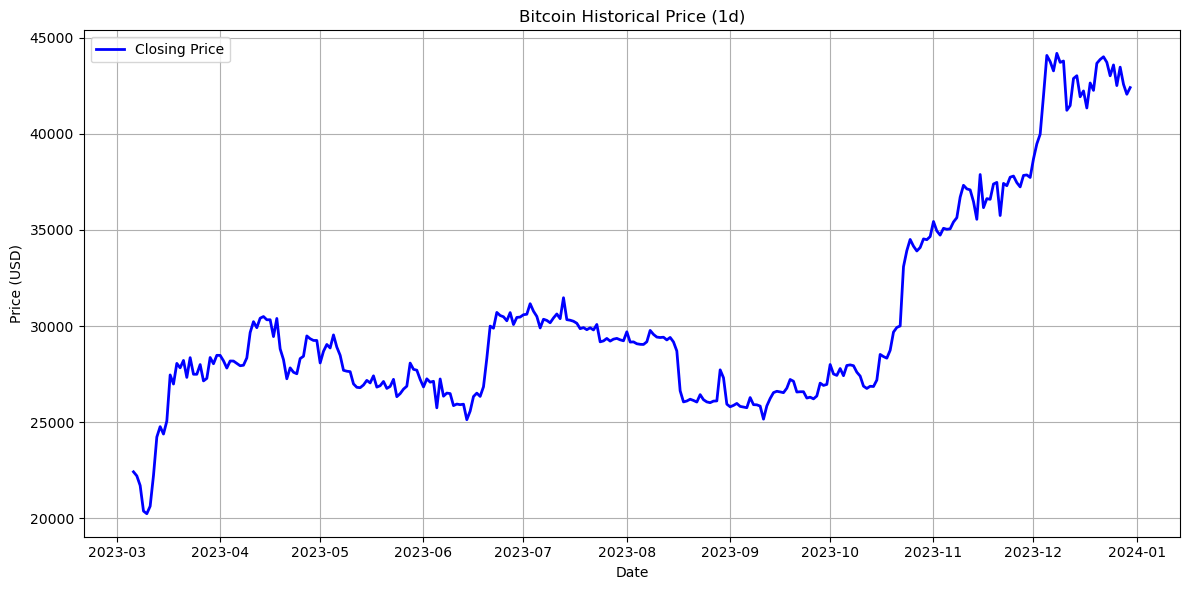

In [36]:
# Define the cryptocurrency symbol and time frame (e.g., 'BTC/USD' for Bitcoin/US Dollar).
symbol = 'BTC/USD'
timeframe = '1d'  # Daily data

# Initialize the cryptocurrency exchange (e.g., Coinbase Pro).
exchange = ccxt.coinbasepro()

# Fetch historical OHLCV (Open, High, Low, Close, Volume) data.
ohlcv = exchange.fetch_ohlcv(symbol, timeframe)

# Convert the data into a DataFrame.
df = pd.DataFrame(ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Convert the timestamp to a readable date format.
df['Date'] = pd.to_datetime(df['Timestamp'], unit='ms')

# Set the 'Date' column as the DataFrame's index.
df.set_index('Date', inplace=True)

# Plot the historical price data.
plt.figure(figsize=(12, 6))
plt.title(f'Bitcoin Historical Price ({timeframe})')
plt.plot(df['Close'], label='Closing Price', color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Show the plot.
plt.tight_layout()
plt.show()


#### Daiy Returns

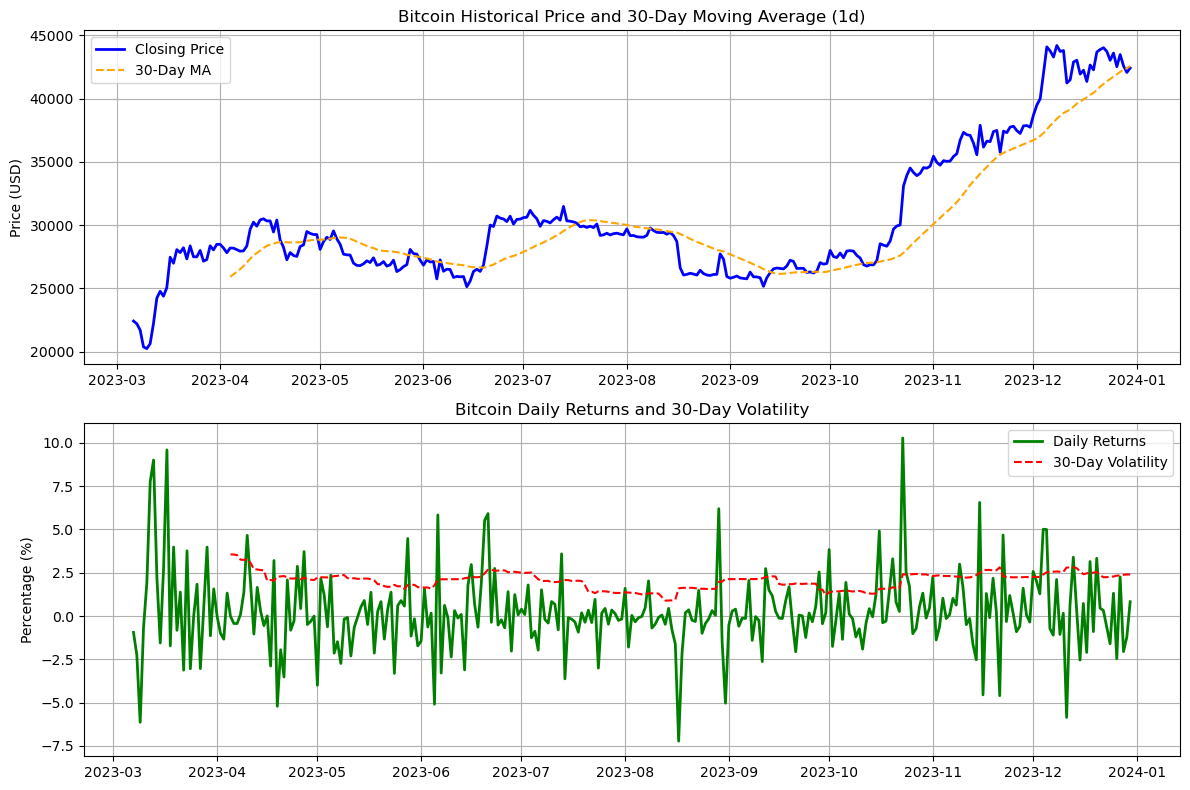

In [37]:
# Calculate daily returns.
df['Daily_Return'] = df['Close'].pct_change() * 100  # Calculate returns as percentage change.

# Calculate rolling 30-day average.
df['30_Day_MA'] = df['Close'].rolling(window=30).mean()

# Calculate rolling 30-day volatility (standard deviation of returns).
df['30_Day_Volatility'] = df['Daily_Return'].rolling(window=30).std()

# Plot the historical price data and metrics.
plt.figure(figsize=(12, 8))

# Plot Closing Price.
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Closing Price', color='blue', linewidth=2)
plt.plot(df['30_Day_MA'], label='30-Day MA', color='orange', linestyle='--')
plt.title(f'Bitcoin Historical Price and 30-Day Moving Average ({timeframe})')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Plot Daily Returns and Volatility.
plt.subplot(2, 1, 2)
plt.plot(df['Daily_Return'], label='Daily Returns', color='green', linewidth=2)
plt.plot(df['30_Day_Volatility'], label='30-Day Volatility', color='red', linestyle='--')
plt.title(f'Bitcoin Daily Returns and 30-Day Volatility')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)

# Show the plots.
plt.tight_layout()
plt.show()

### time-series analysis

In [44]:
!pip install pandas matplotlib statsmodels

In [51]:
# Specify the file path where you want to save the CSV file.
csv_file_path = 'bitcoin_price_data.csv'

# Save the DataFrame to a CSV file.
df.to_csv(csv_file_path)

In [54]:
display(df)

,Timestamp,Open,High,Low,Close,Volume
Date,,,,,,
2023-03-06,1678060800000,22431.99,22599.99,22264.73,22410.31,10660.048643
2023-03-07,1678147200000,22410.13,22557.03,21932.74,22198.48,10381.244228
2023-03-08,1678233600000,22198.09,22281.55,21580.84,21698.37,13343.725758
2023-03-09,1678320000000,21699.41,21825.53,20050.00,20367.01,21326.080971
2023-03-10,1678406400000,20366.97,20369.78,19568.52,20230.08,32126.592075
...,...,...,...,...,...,...
2023-12-26,1703548800000,43589.67,43605.00,41600.67,42515.53,13030.025453
2023-12-27,1703635200000,42521.21,43709.98,42111.47,43474.40,12917.484045
2023-12-28,1703721600000,43469.06,43830.34,42265.08,42581.23,13583.915998


In [57]:
# Convert the DataFrame into a time series with a daily frequency
bitcoin_price_ts = df['Close']

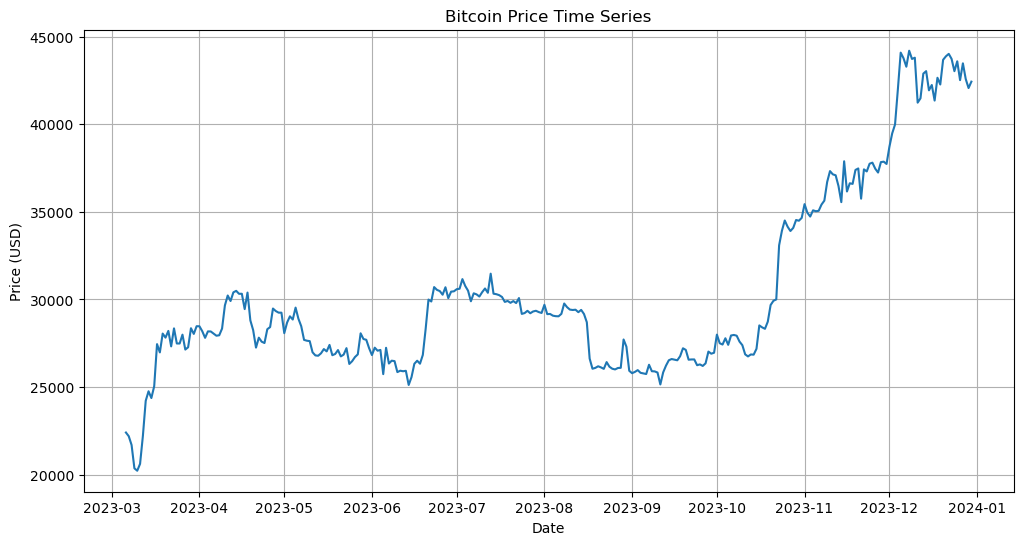

In [58]:
# Visualise the time series
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_price_ts)
plt.title('Bitcoin Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


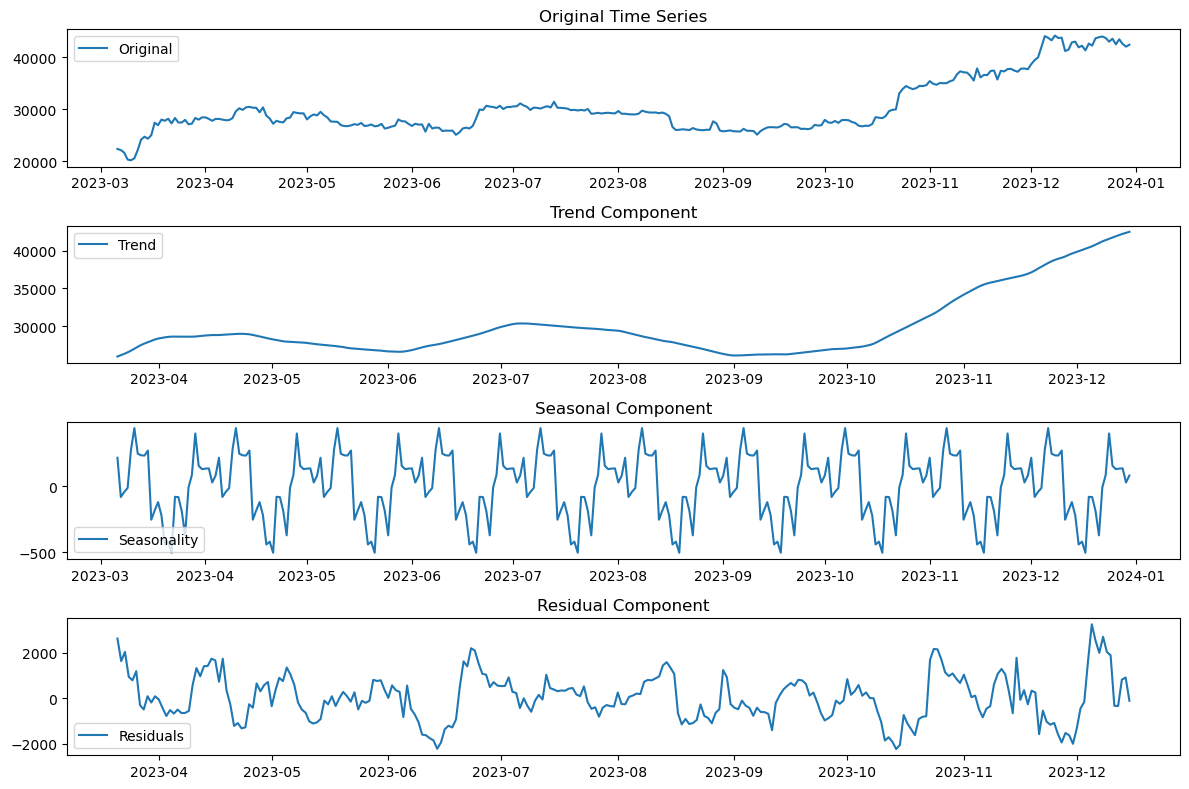

In [60]:
# Decompose the time series to identify trends, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series with a shorter period
decomposition = seasonal_decompose(bitcoin_price_ts, model='additive', period=30)  # for monthly seasonality

# Plot the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(bitcoin_price_ts, label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


To further the analysis we can consider: 

__Correlation Analysis:__ Explore correlations between Bitcoin's price and other economic indicators or events in the United States, such as stock market performance, inflation rates, or economic policies. Analyse how external factors may have influenced Bitcoin's price.

__Regression Analysis:__ model the relationship between Bitcoin's price and various factors, including time, trading volume, and demographics. Use regression models to make predictions about future price movements.

__Sentiment Analysis:__ Analyse social media and news sentiment related to Bitcoin in the United States using natural language processing (NLP) techniques. Investigate whether sentiment data can be used to predict short-term price movements or public perception of Bitcoin.

__Market Capitalisation Analysis:__ Calculate and visualise Bitcoin's market capitalisation relative to other assets or financial indicators. Investigate whether Bitcoin's market cap growth aligns with its adoption rate.

__Scenario Analysis:__ Create various scenarios for Bitcoin's future growth in the United States, considering factors like regulatory changes, institutional adoption, and macroeconomic conditions. Estimate the potential impact of different scenarios on Bitcoin's price and adoption.

__Adoption and Usage Trends:__ Analyse data on Bitcoin wallet adoption, transaction volume, and merchant acceptance in the United States.
Assess whether Bitcoin is gaining traction as a means of payment or a store of value.

__Regression Models for Future Price Prediction:__ Build predictive models, such as ARIMA or machine learning algorithms, to forecast Bitcoin's future price movements based on historical data and relevant features. Evaluate the accuracy of these models and consider their implications for future growth.

__Risk Analysis:__ Assess the risks associated with Bitcoin investment and adoption in the United States, including regulatory risks, security risks, and market risks. Evaluate how these risks may impact future growth and adoption.